# Prepare rules for the all the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

In [1]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
movies = pd.read_csv("C:\\Excelr Data\\Assignments\\Association Rules\\my_movies.csv")

In [3]:
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
from collections import Counter

In [6]:
movies.columns # give column names in eth dataframe


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Sixth Sense', 'Gladiator', 'LOTR1',
       'Harry Potter1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR',
       'Braveheart', 'Green Mile'],
      dtype='object')

In [7]:
movies= movies.iloc[:,5:15] # removing columns without dummies


In [8]:
movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [9]:
all_movies_list = []


In [10]:
all_movies_list = [i for item in movies for i in item]
all_movies_list

['S',
 'i',
 'x',
 't',
 'h',
 ' ',
 'S',
 'e',
 'n',
 's',
 'e',
 'G',
 'l',
 'a',
 'd',
 'i',
 'a',
 't',
 'o',
 'r',
 'L',
 'O',
 'T',
 'R',
 '1',
 'H',
 'a',
 'r',
 'r',
 'y',
 ' ',
 'P',
 'o',
 't',
 't',
 'e',
 'r',
 '1',
 'P',
 'a',
 't',
 'r',
 'i',
 'o',
 't',
 'L',
 'O',
 'T',
 'R',
 '2',
 'H',
 'a',
 'r',
 'r',
 'y',
 ' ',
 'P',
 'o',
 't',
 't',
 'e',
 'r',
 '2',
 'L',
 'O',
 'T',
 'R',
 'B',
 'r',
 'a',
 'v',
 'e',
 'h',
 'e',
 'a',
 'r',
 't',
 'G',
 'r',
 'e',
 'e',
 'n',
 ' ',
 'M',
 'i',
 'l',
 'e']

In [11]:
item_frequencies = Counter(all_movies_list)
item_frequencies

Counter({'S': 2,
         'i': 4,
         'x': 1,
         't': 9,
         'h': 2,
         ' ': 4,
         'e': 9,
         'n': 2,
         's': 1,
         'G': 2,
         'l': 2,
         'a': 7,
         'd': 1,
         'o': 4,
         'r': 11,
         'L': 3,
         'O': 3,
         'T': 3,
         'R': 3,
         '1': 2,
         'H': 2,
         'y': 2,
         'P': 3,
         '2': 2,
         'B': 1,
         'v': 1,
         'M': 1})

In [12]:
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies

[('x', 1),
 ('s', 1),
 ('d', 1),
 ('B', 1),
 ('v', 1),
 ('M', 1),
 ('S', 2),
 ('h', 2),
 ('n', 2),
 ('G', 2),
 ('l', 2),
 ('1', 2),
 ('H', 2),
 ('y', 2),
 ('2', 2),
 ('L', 3),
 ('O', 3),
 ('T', 3),
 ('R', 3),
 ('P', 3),
 ('i', 4),
 (' ', 4),
 ('o', 4),
 ('a', 7),
 ('t', 9),
 ('e', 9),
 ('r', 11)]

In [13]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
frequencies


[11,
 9,
 9,
 7,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1]

In [14]:
items = list(reversed([i[0] for i in item_frequencies]))
items

['r',
 'e',
 't',
 'a',
 'o',
 ' ',
 'i',
 'P',
 'R',
 'T',
 'O',
 'L',
 '2',
 'y',
 'H',
 '1',
 'l',
 'G',
 'n',
 'h',
 'S',
 'M',
 'v',
 'B',
 'd',
 's',
 'x']

In [15]:
# barplot of top 10 
import matplotlib.pyplot as plt


Text(0, 0.5, 'Count')

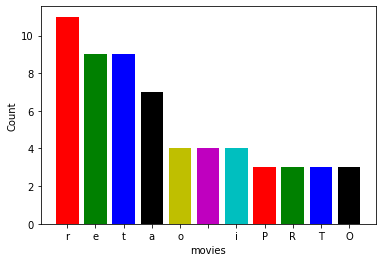

In [16]:
plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[0:11]);plt.xlabel("movies")
plt.ylabel("Count")
#top 10 movies.

In [17]:
frequent_itemsets = apriori(movies, min_support=0.005, max_len=3,use_colnames = True)#building apriori model-max lenght- max item set will be 3.
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [18]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)


Text(0, 0.5, 'support')

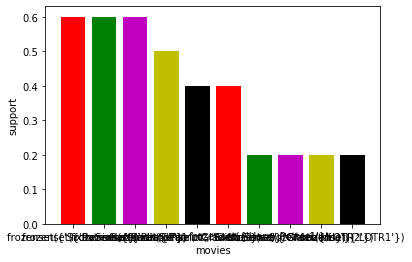

In [19]:
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('movies');plt.ylabel('support')  


In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
119,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
120,"(Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
121,(Green Mile),"(Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
122,(Harry Potter1),"(Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [21]:
rules.sort_values('lift',ascending = False,inplace=True)#with respect to lift we are doing descending order.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
82,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
123,(LOTR2),"(Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
49,"(Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
36,(LOTR1),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
...,...,...,...,...,...,...,...,...,...
7,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
29,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


In [22]:
rules.shape

(124, 9)

## To eliminate Redudancy in Rules #################################### 


In [23]:
def to_list(i):
    return (sorted(list(i)))

In [24]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X

83            [LOTR, Gladiator, Green Mile]
82            [Gladiator, Green Mile, LOTR]
123      [LOTR2, Green Mile, Harry Potter1]
49       [Green Mile, LOTR1, Harry Potter1]
36      [LOTR1, Harry Potter1, Sixth Sense]
                       ...                 
7         [Gladiator, Patriot, Sixth Sense]
5                    [Sixth Sense, Patriot]
4                    [Patriot, Sixth Sense]
29     [Gladiator, Sixth Sense, Green Mile]
30     [Green Mile, Gladiator, Sixth Sense]
Length: 124, dtype: object

In [25]:
ma_X = ma_X.apply(sorted)
ma_X

83            [Gladiator, Green Mile, LOTR]
82            [Gladiator, Green Mile, LOTR]
123      [Green Mile, Harry Potter1, LOTR2]
49       [Green Mile, Harry Potter1, LOTR1]
36      [Harry Potter1, LOTR1, Sixth Sense]
                       ...                 
7         [Gladiator, Patriot, Sixth Sense]
5                    [Patriot, Sixth Sense]
4                    [Patriot, Sixth Sense]
29     [Gladiator, Green Mile, Sixth Sense]
30     [Gladiator, Green Mile, Sixth Sense]
Length: 124, dtype: object

In [26]:
rules_sets = list(ma_X)
rules_sets

[['Gladiator', 'Green Mile', 'LOTR'],
 ['Gladiator', 'Green Mile', 'LOTR'],
 ['Green Mile', 'Harry Potter1', 'LOTR2'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['LOTR1', 'LOTR2', 'Sixth Sense'],
 ['LOTR1', 'LOTR2', 'Sixth Sense'],
 ['LOTR1', 'LOTR2', 'Sixth Sense'],
 ['LOTR1', 'LOTR2', 'Sixth Sense'],
 ['Green Mile', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Green Mile', 'LOTR'],
 ['Green Mile', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Harry Potter1', 'LOTR1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Green Mile', 'Harry Potter1', 'LOTR1'],
 ['Gladiator', 'Green Mile', 'LOTR'],
 ['Green Mile', 'LOTR'],
 ['Green Mile', 'Harry Potter1', 'Sixth Sense'],
 ['Green Mile', 'Harry Potter1', 'Sixth Sense'],
 ['Green Mile', 'LOTR'],
 ['Har

In [27]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]


In [28]:
index_rules = []

In [29]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [30]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [31]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
83,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
36,(LOTR1),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
60,"(Harry Potter1, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
16,"(Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
56,"(Sixth Sense, Harry Potter1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
49,"(Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
69,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
95,(Green Mile),"(Sixth Sense, LOTR)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
86,"(Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
44,"(Sixth Sense, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [32]:
## 3D plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
support = rules_no_redudancy["support"]
confidence = rules_no_redudancy["confidence"]
lift = rules_no_redudancy["lift"]

Text(0.5, 0, 'lift')

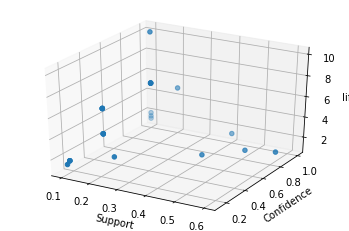

In [34]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

Text(0, 0.5, 'confidence')

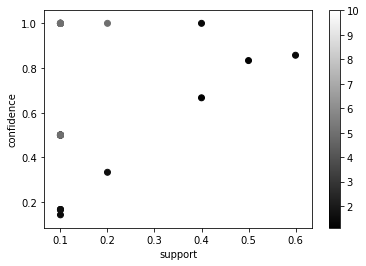

In [35]:
## Scatter plot
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")

### Changing the support value to 0.007


In [50]:
frequent_itemsets1 = apriori(movies, min_support=0.007, max_len=10,use_colnames = True)#building apriori model-max lenght- max item set will be 10.
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [51]:
#Most frequent items based on the support, decending order
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)


In [52]:
##Building rules
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
...,...,...,...,...,...,...,...,...,...
233,(Green Mile),"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR1),"(Sixth Sense, Green Mile, LOTR2, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(LOTR2),"(Sixth Sense, Green Mile, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Harry Potter1),"(Sixth Sense, Green Mile, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [53]:
##Rules2 are the rules which are generated with the minimum threshold as 1
rules1.sort_values('lift',ascending = False , inplace = True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
222,"(Sixth Sense, LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
223,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
82,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
109,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
110,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
8,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
179,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


### Elimiinating the redundancie

In [54]:
def to_list1(i):
    return(sorted(i))

In [55]:
ma_x1 = rules1.antecedents.apply(to_list1)+ rules1.consequents.apply(to_list1)

In [56]:
ma_x1 = ma_x1.apply(sorted)

In [57]:
rules1_sets = list(ma_X)


In [58]:
unique_rules1_sets = [list(m) for m in set(tuple(i) for i in rules1_sets)]
index_rules1 = []
for i in unique_rules_sets:
    index_rules1.append(rules1_sets.index(i))

In [59]:
# getting rules without any redudancy 
rules1_no_redudancy  = rules1.iloc[index_rules1,:]

In [60]:
# Sorting them with respect to list and getting top 10 rules 
rules1_no_redudancy.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
110,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
24,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
222,"(Sixth Sense, LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
38,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
216,"(Green Mile, LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
109,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
83,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
228,"(Harry Potter1, LOTR1)","(Sixth Sense, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
151,"(Sixth Sense, LOTR2)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
